# Image to Pencil Sketch

 - To convert an image to a pencil sketch using Python, we use the OpenCV library, which is a powerful computer vision library.
 -  Additionally, we'll use the NumPy library for some image manipulation. 


- Here's the step-by-step process to achieve the pencil sketch effect:
    - Read the input image.
    - Convert the image to grayscale.
    - Invert the grayscale image.
    - Apply a Gaussian blur to the inverted image.
    - Blend the grayscale image and the blurred image to - create the pencil sketch effect.

- The only library we need for converting an image into a pencil sketch is an OpenCV library in Python

In [1]:
import cv2
import matplotlib.pyplot as plt


#### Read the image
  - To display the image we use two commands
    - cv2.imshow() and cv2.waitkey(0) - display the window infinitely until any keypress

 - In OpenCV, cv2.imshow() will not work inside a Jupyter Notebook. Instead, we use plt.imshow() from the matplotlib library. Here's how to do it:

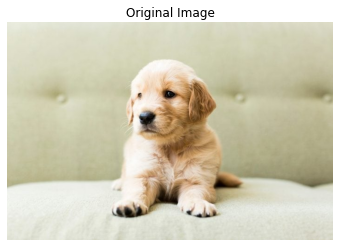

In [2]:
image = cv2.imread("Dog.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()


- image = cv2.imread("Dog.jpg"): This line reads an image file named "Dog.jpg" using the cv2.imread() function from the OpenCV library.

-  The function takes the file path as an argument and returns a NumPy array representing the image. The image is stored in the variable named image.


-  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)): The plt.imshow() function from the matplotlib.pyplot module is used to display the image. However, before displaying the image, we need to convert the color channels from BGR (Blue, Green, Red) to RGB (Red, Green, Blue) format. OpenCV reads images in BGR format by default, whereas plt.imshow() expects images in RGB format.


- The cv2.cvtColor() function is used for this color conversion. It takes the image and the conversion code cv2.COLOR_BGR2RGB as arguments and returns the RGB version of the image.

- plt.axis("off"): This line turns off the axis ticks and labels in the displayed image. It removes the axis numbering and any gridlines from the plot.

- plt.show(): This line is used to display the image in the Jupyter Notebook. plt.show() is a blocking function, which means it will halt the execution of the code until the image window is closed. The image will be displayed using the matplotlib.pyplot library, which is commonly used for visualizations in Python.

#### Convert the original image to greyscale

- Now after reading the image, we will create a new image by converting the original image to greyscale

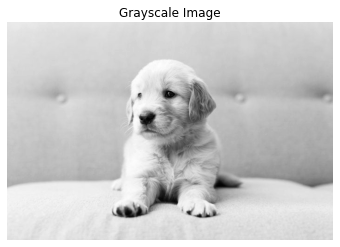

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()


- Convert to Grayscale: We convert the original image to grayscale using cv2.cvtColor() with the cv2.COLOR_BGR2GRAY conversion code. The resulting grey_image will be a 2D array representing the grayscale image.

- Display the Grayscale Image: We use plt.imshow() to display the grayscale image. Since the image is single-channel (2D), we use the cmap="gray" parameter to display it in grayscale. The plt.axis("off") function is used to turn off the axis ticks and labels.

#### Invert the new grayscale image

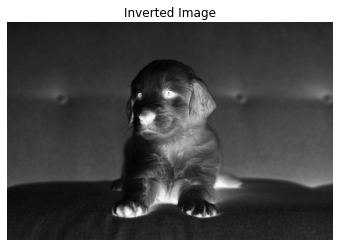

In [4]:
inverted_image = 255 - gray_image
plt.imshow(inverted_image, cmap="gray")
plt.title('Inverted Image')
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()

- Invert the Grayscale Image: We invert the grayscale image by subtracting its pixel values from 255. This creates a negative version of the grayscale image, where the darkest pixels become the lightest and vice versa.

#### Blur the image by using the Gaussian Function in OpenCV:


- The blurring process helps in achieving a smoother and more visually appealing pencil-like appearance in the final sketch. It serves two primary purposes:
    - 1. Noise Reduction
      - Smoothen out unwanted details, resulting in cleaner and more polished pencil sketch
    - 2. Edge enhancement
      - Enhances the edges and creates a gentle transition between different regions of the sketch, mimicking the soft lines and strokes of a pencil

In [5]:
blurred = cv2.GaussianBlur(inverted_image, (21, 21), 0)

- cv2.GaussianBlur(inverted_image, (21, 21), 0) applies a Gaussian blur to the inverted grayscale image (inverted_image). The cv2.GaussianBlur() function smoothes the image using a Gaussian kernel. The (21, 21) argument specifies the size of the kernel, and the last argument 0 is the standard deviation of the Gaussian distribution (set to 0 to let the function calculate it automatically).

- With this addition to the code, it will now display both the original image and its corresponding pencil sketch side by side in the Jupyter Notebook output. The pencil sketch effect is achieved by blending the grayscale image with the Gaussian-blurred inverted grayscale image, producing a visually appealing pencil sketch representation of the original image.

#### Invert the blurred image to convert the image into pencil sketch

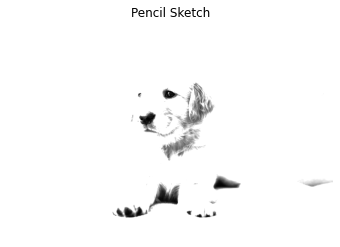

In [7]:
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_image, scale=256.0)
plt.imshow(pencil_sketch, cmap="gray")
plt.title('Pencil Sketch')
plt.axis("off")  # Optional: Turn off axis ticks and labels
plt.show()

- Invert the Blurred Image: We invert the blurred image by subtracting its pixel values from 255. This creates a negative version of the blurred image.

- Create the Pencil Sketch: We create the pencil sketch by blending the grayscale image with the inverted blurred image using cv2.divide(). 

- The cv2.divide() function performs element-wise division between the two images (gray_image and inverted_blurred). The scale=256.0 parameter scales the result to avoid pixel overflow.

- The basic idea behind using cv2.divide() for the pencil sketch effect is to simulate the process of lightening the original grayscale image using the inverted blurred image. This process is called the "Dodge" blending mode, which is commonly used in image processing to create various artistic effects, including pencil sketches.

- Here's how the Dodge blending mode works:

- The original grayscale image contains pixel values that represent different shades of gray, ranging from 0 (black) to 255 (white).

- The inverted blurred image contains pixel values that are also in the range of 0 to 255, but they are "inverted" in the sense that the darkest pixels become the lightest and vice versa.

- When we perform element-wise division using cv2.divide() between the grayscale image and the inverted blurred image, the resulting pixel values will be the result of lightening the grayscale image based on the intensity of the corresponding pixel in the inverted blurred image.

- In areas where the inverted blurred image is dark (representing strong edges or details in the original image), the division will lighten the corresponding pixels in the grayscale image. This process effectively enhances the edges and highlights the features, creating a pencil sketch-like appearance.

- In areas where the inverted blurred image is light (representing smoother regions in the original image), the division will have little effect on the grayscale image, preserving its original intensity.

- By combining the Dodge blending mode with the Gaussian blur, we achieve a smooth and visually appealing pencil sketch effect, with enhanced edges and a soft transition between different regions, closely resembling a hand-drawn pencil sketch.